In [0]:
#Description : this program is for heart disease Yes OR NO


In [5]:
import seaborn as sns
import numpy as np
import pandas as pd


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#load Data


In [6]:
#upload data from your computer, NOTE:only if you use Google Colab Notebook
from google.colab import files
uploaded = files.upload()

In [7]:
#read csv file with pandas ,read csv
df=pd.read_csv('cardio_train.csv',sep=';')
#get the 5 first rows from your csv file default=5 ,if you want n rows , write df.head(n)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#get the shape of the data
df.shape
#get the shape of the data
df.size

910000

In [9]:
#check the missing values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
#check if True Or False , if any values is missing
df.isnull().values.any()

False

In [11]:
#view basic statistics (std,min,max,mean,count....)
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#count the number of patient with cardiovascular disease
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

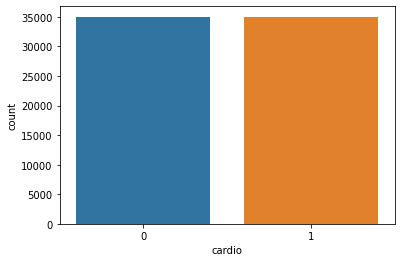

In [13]:
#visualize the count
sns.countplot(df['cardio'])

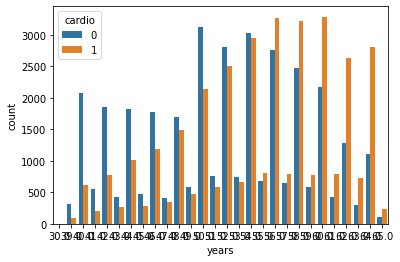

In [16]:
#create a column years from age(Days)
df['years']=(df['age']/365).round(0)
df['years']
#visualize x=years with y=numberOfPeopleInfected 

sns.countplot(x='years',hue='cardio',data=df)


In [17]:
#get correlation columns , to view the importance of each column (if 1 doesnt matter  ,if ¬=0 interesting)
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


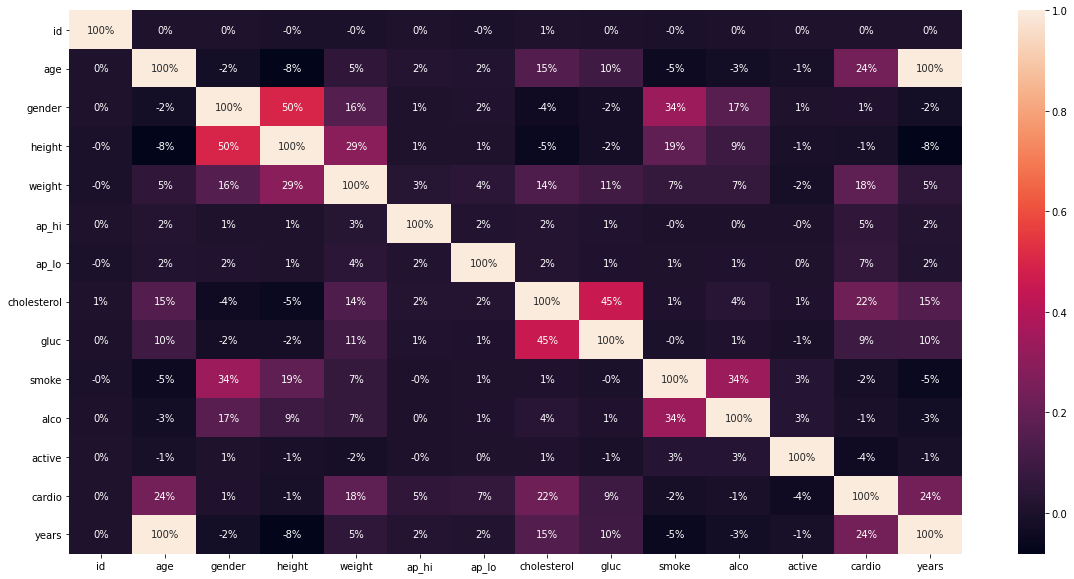

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [0]:
#drop years columns 100% of correlation
df = df.drop('years',axis=1)

#drop id columns 100% of correlation
df = df.drop('id',axis=1) 



In [20]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [0]:
#split the data , features and labels
X = df.iloc[:,:11].values
Y = df.iloc[:,-1].values



In [0]:
#split data , 75% training dataset , 25% test 
from sklearn.model_selection import train_test_split 

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)


In [0]:
#Features Scaling
#normalisation , transform data to values between 0 and 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
#train the model 
#use RandomForest Classfier 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [25]:
#get the result of the TEST DATA
forest.score(X_test,Y_test)


0.6932

In [0]:
#test model accuracy for the test data using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,forest.predict(X_test))
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [27]:
#print the confusion matrix
print(cm)


#print the model accuracy for test data

print('model Accuracy for test data : ',(TP+TN)/(TP+TN+FN+FP))

print('model Accuracy for test data : ',forest.score(X_test,Y_test))


[[6589 2020]
 [3349 5542]]
model Accuracy for test data :  0.6932
model Accuracy for test data :  0.6932


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, Y_train)
    scores[key] = model.score(X_test, Y_test)
  


In [3]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver = 'lbfgs',random_state=0).fit(X_train,Y_train)
LR.score(X_test,Y_test)


NameError: ignored

In [55]:
#Import and Apply PCA
# Make an instance of the Model
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
PCAX_train = pca.transform(X_train)
PCAX_test = pca.transform(X_test)


In [2]:
#we will test if accuraccy will increase or not 
LR=LogisticRegression(C=74, penalty="l1", solver="liblinear",random_state=0).fit(PCAX_train,Y_train)
LR.score(PCAX_test,Y_test)

#so accuracy changed a little

NameError: ignored